<a href="https://colab.research.google.com/github/IsaacFigNewton/DisCoFuzz/blob/main/DisCoCirc_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies

In [1]:
!pip install lambeq maverick-coref

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.6/269.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 37.4 MB/s eta 0:00:00
  Created wheel for maverick-coref: filename=maverick_coref-1.0.7-py3-none-any.whl size=47810 sha256=763c5a00875c608f7101445f8e16994d8d5034c135e29d113037815cadbb0484
  Stored in directory: /root/.cache/pip/wheels/f6/98/a7/48bd1e1c9bae92f17261

# Import/Config

In [2]:
from lambeq import BobcatParser
from lambeq.experimental.discocirc import DisCoCircReader

reader = DisCoCircReader()
parser = BobcatParser(verbose='suppress')

Evaluating checksum: 0.0%|          |0.000/1.533GB [00:00<?]

Extracting model...
sapienzanlp/maverick-mes-ontonotes loading


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


weights.ckpt:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/874M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/874M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


# Test DisCoCirc Parsing, Rewriting

In [3]:
test = 'The quick brown fox jumps over the lazy dog.'

In [11]:
# text = "He worked day and night, but he'd had enough. Today would be the day that Steve would quit his job. No longer would he be subjected to such cruel punishments and long hours. No. He and Mary could finally leave this hell-hole."
diagram = reader.text2circuit(
    text=test,
    rewrite_rules=[
        "determiner",
        "auxiliary",
        "noun_modification",
        "verb_modification",
        "sentence_modification"
    ]
)

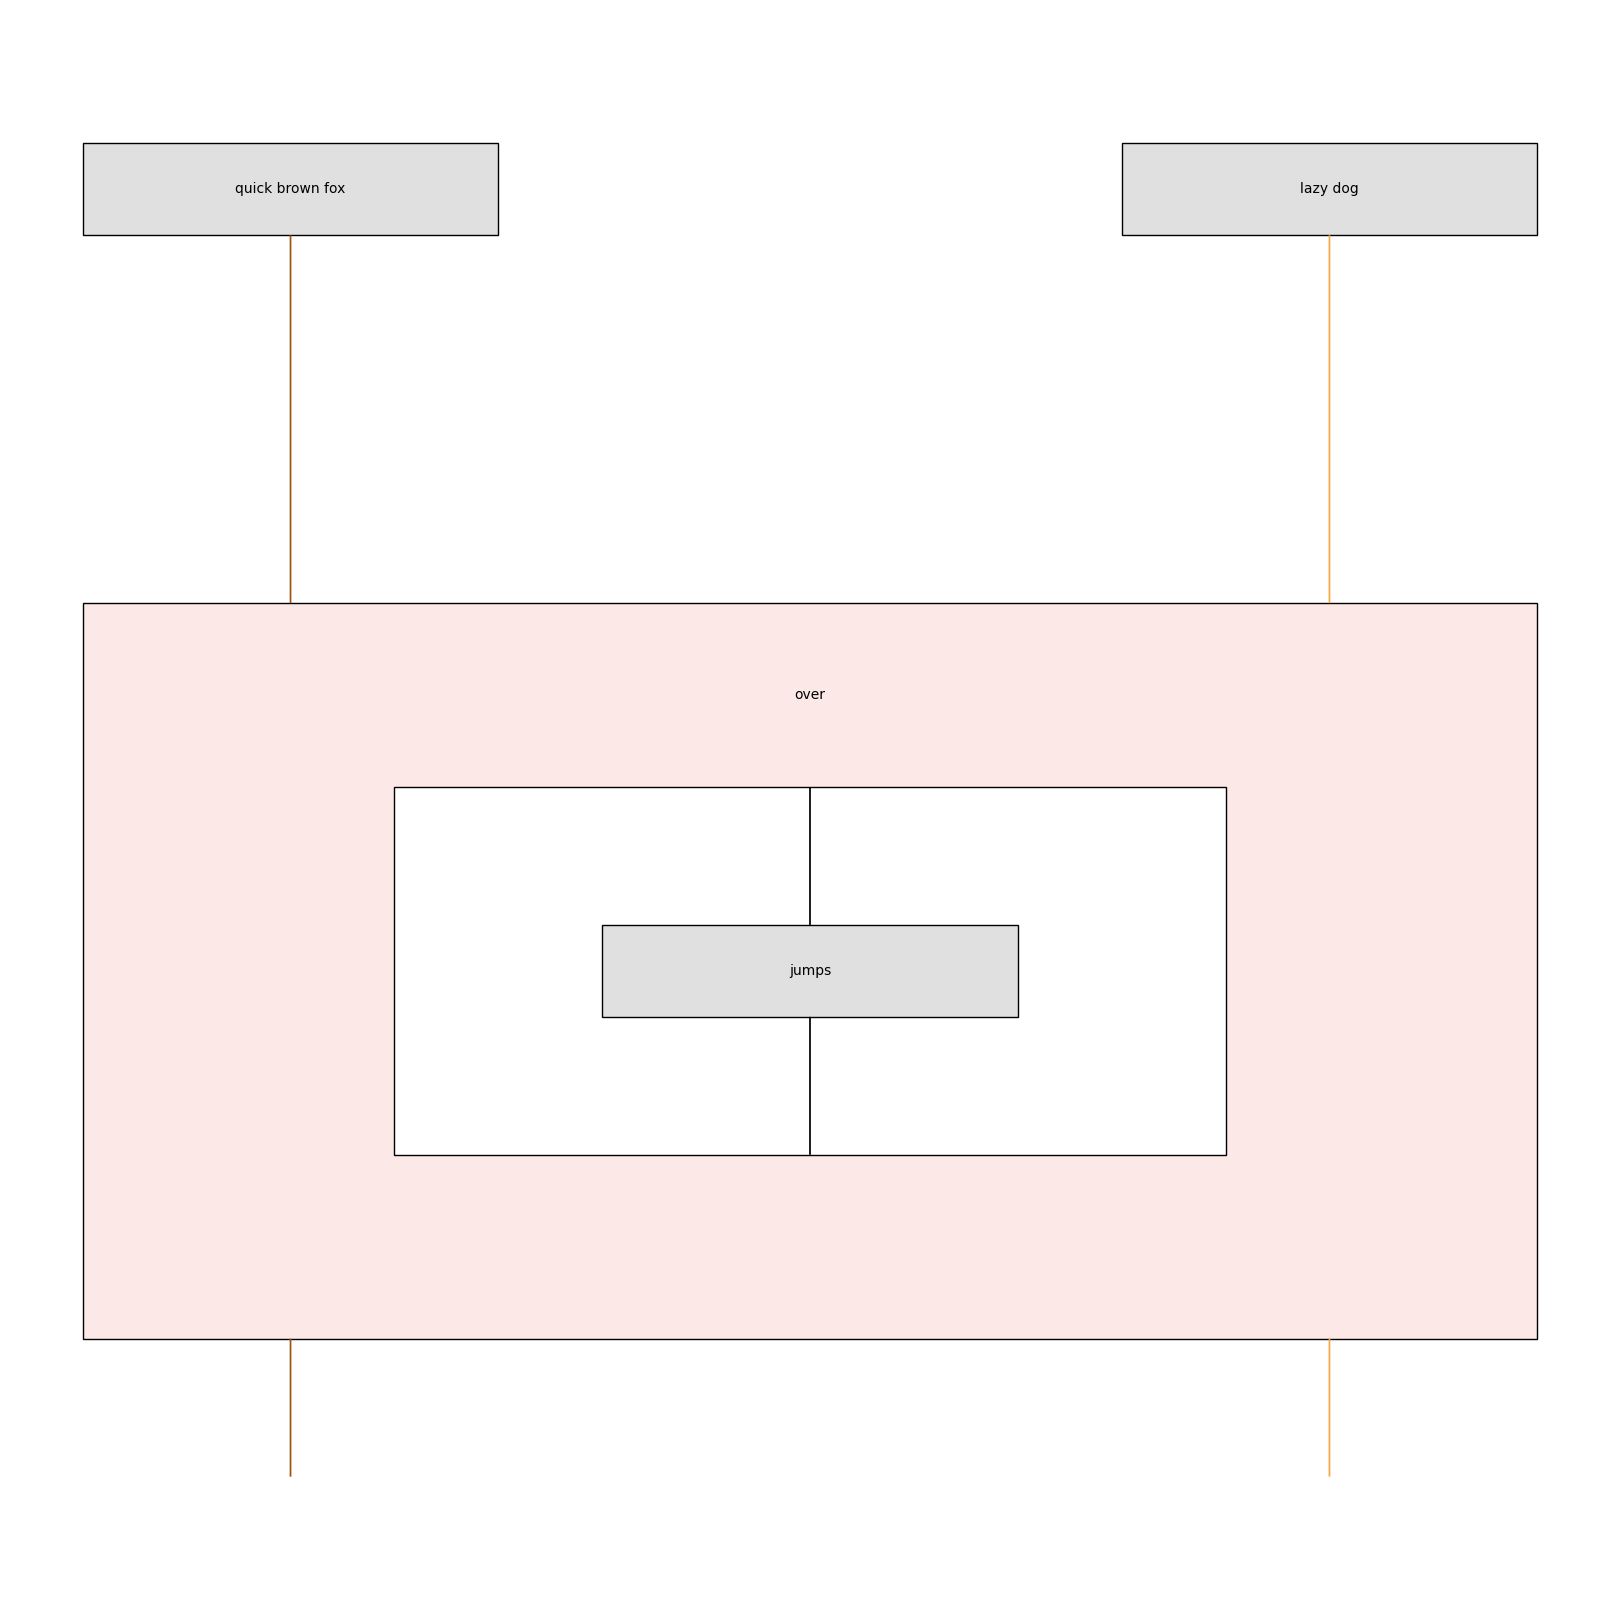

In [12]:
diagram.draw(figsize=(16, 16))

# Try training a model

## Import and Config

In [ ]:
import random
import numpy as np
import torch

In [ ]:
BATCH_SIZE = 10
EPOCHS = 30
LEARNING_RATE = 0.01
SEED = 42

In [ ]:
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Test